### 极限森林

In [1]:
# 依然使用上面的数据
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn import datasets
import graphviz
from sklearn import tree

In [2]:
X,y = datasets.load_wine(return_X_y=True)

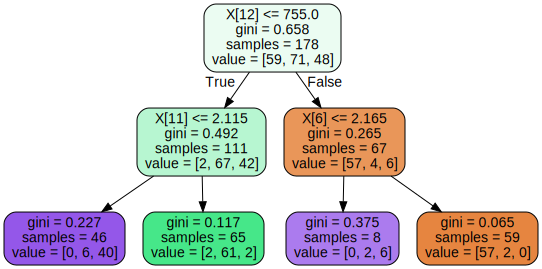

In [16]:
model = DecisionTreeClassifier(max_depth=2) # 筛选条件，最优的
model.fit(X,y)
dot_data = tree.export_graphviz(model,filled=True,rounded=True)
graphviz.Source(dot_data)

In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [7]:
count = []
for i in range(3):
    count.append((y == i).sum())
count = np.array(count)
p = count / count.sum() # 计算概率

gini = (p * (1 - p)).sum()
print('未分裂，gini系数是：',round(gini,3))

未分裂，gini系数是： 0.658


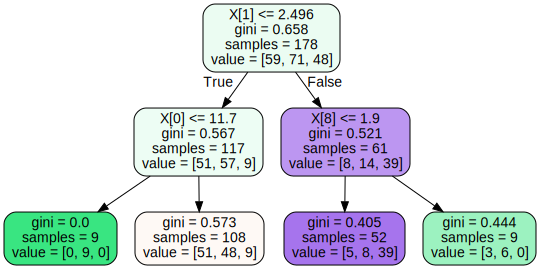

In [14]:
clf = ExtraTreesClassifier(n_estimators=3,max_depth=2)
clf.fit(X,y)
dot_data = tree.export_graphviz(clf[0],filled=True,rounded=True)
graphviz.Source(dot_data)

In [10]:
f = np.sort(X[:,12])
gini_lower = 1
best_split = {}
for i in range(len(f) - 1):
    split = round(f[i:i + 2].mean(),3)
    cond = X[:,12] <= split
    part1 = y[cond]
    part2 = y[~cond]
    # 计算每一部分的gini系数
    count1 = []
    count2 = []
    for j in range(3):
        count1.append((part1 == j).sum())
        count2.append((part2 == j).sum())
    count1,count2 = np.array(count1),np.array(count2)
    p1 = count1 / count1.sum()
    p2 = count2 / count2.sum()
    gini1 = round((p1 * (1 - p1)).sum(),3)
    gini2 = round((p2 * (1 - p2)).sum(),3)
    # 计算整体的gini系数
    gini = round(gini1 * count1.sum()/(y.size) + gini2 * count2.sum()/(y.size),3)
    if gini <= gini_lower:
        gini_lower = gini
        best_split.clear()
        best_split['最佳裂分条件：'] = split
#     print(split,gini1,gini2,gini,count1,count2)
print(best_split,gini_lower)

{'最佳裂分条件：': 755.0} 0.407


In [12]:
np.round(111/178 * 0.492 + 67/178 * 0.265,3)

0.407

### GBDT梯度提升树

In [24]:
#gradient 梯度，导数
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz

In [19]:
X,y = datasets.load_iris(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1124)

普通决策树

决策分类树得分是： 0.8421052631578947


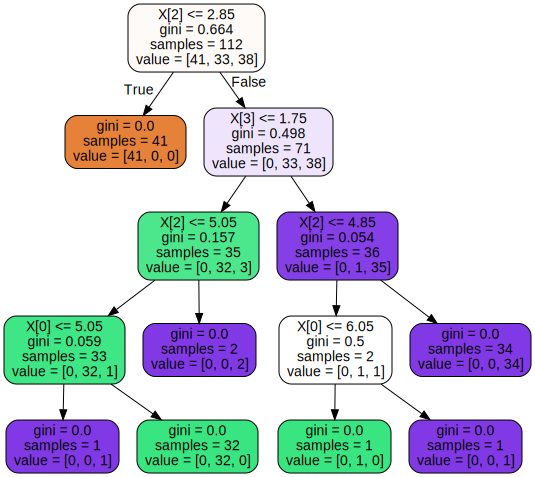

In [25]:
model = DecisionTreeClassifier() # 一棵树，单打独斗,分类：信息熵、gini系数
model.fit(X_train,y_train)
print('决策分类树得分是：',model.score(X_test,y_test))

dot_data = tree.export_graphviz(model,filled=True,rounded=True)
graphviz.Source(dot_data)

梯度提升树

梯度提升树得分是： 0.9473684210526315


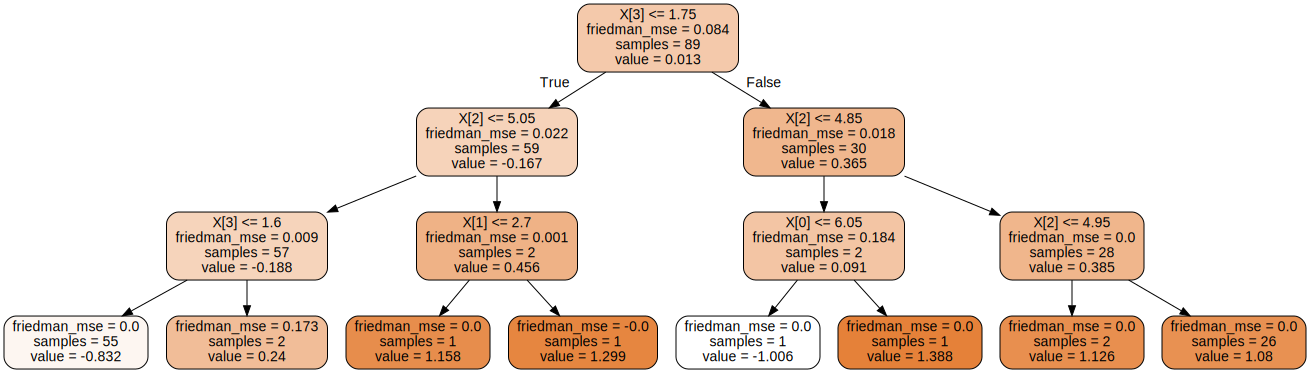

In [33]:
model = GradientBoostingClassifier(subsample=0.8,# 随机抽样比例
                                   learning_rate=0.005)# 学习率
model.fit(X_train,y_train)
print('梯度提升树得分是：',model.score(X_test,y_test))

# 三分类，100 * 3 = 300
dot_data = tree.export_graphviz(model[99,2],filled=True,rounded=True)
graphviz.Source(dot_data)

### GBDT梯度提升分类树算法示例

#### 创建数据

In [34]:
import numpy as np
import graphviz
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier

In [35]:
X = np.arange(1,11).reshape(-1,1)
y = np.array([0,0,0,1,1]*2)
display(X,y)

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 1])

#### 构建GBDT训练和预测

In [39]:
clf = GradientBoostingClassifier(n_estimators=3,learning_rate=0.1,max_depth=1)
clf.fit(X,y)
y_ = clf.predict(X)
print('预测结果是：',y_)

预测结果是： [0 0 0 0 0 0 0 0 1 1]


In [40]:
clf.predict_proba(X)

array([[0.66466915, 0.33533085],
       [0.66466915, 0.33533085],
       [0.66466915, 0.33533085],
       [0.6126304 , 0.3873696 ],
       [0.6126304 , 0.3873696 ],
       [0.6126304 , 0.3873696 ],
       [0.6126304 , 0.3873696 ],
       [0.6126304 , 0.3873696 ],
       [0.46804618, 0.53195382],
       [0.46804618, 0.53195382]])

#### 第一棵树可视化

In [45]:
clf[0,0]

DecisionTreeRegressor(criterion='friedman_mse', max_depth=1,
                      random_state=RandomState(MT19937) at 0x1DAFEA05840)

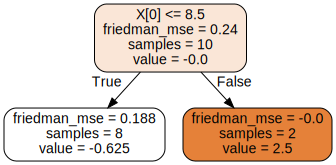

In [44]:
dot_data = tree.export_graphviz(clf[0,0],filled=True,rounded=True)
graphviz.Source(dot_data)

#### 第二棵树

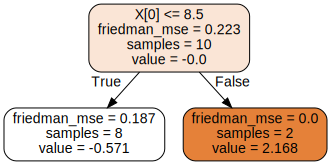

In [46]:
dot_data = tree.export_graphviz(clf[1,0],filled=True,rounded=True)
graphviz.Source(dot_data)

#### 第三棵树

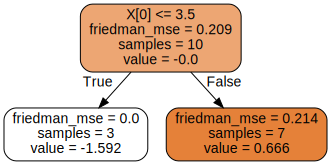

In [47]:
dot_data = tree.export_graphviz(clf[2,0],filled=True,rounded=True)
graphviz.Source(dot_data)

#### 拟合第一棵树

<font size = 6>$F_0(x) = log\frac{\sum\limits_{i=1}^Ny_i}{\sum\limits_{i=1}^N(1 -y_i)}$​​​​​</font>

In [48]:
y

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 1])

In [49]:
# 函数初始值
F0 = np.log(y.sum()/(1 - y).sum())
F0

-0.40546510810816444

<font size = 6>$residual = \widetilde{y}= y - \frac{1}{1+exp(-F(x))}$ </font>

In [50]:
# 计算残差：真实值和预测值之间的差
residual0 = y - 1/(1 + np.exp(-F0))
residual0

array([-0.4, -0.4, -0.4,  0.6,  0.6, -0.4, -0.4, -0.4,  0.6,  0.6])

<font size = 6>$mse = ((residual - residual.mean())^2).mean()$</font>

In [51]:
# 未进行分裂时，均方误差
((residual0 - residual0.mean())**2).mean()

0.24

In [53]:
X.reshape(-1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [56]:
lower_mse = 0.24
best_split = {}
# 分裂标准
for i in range(0,10): # i 从0开始
    if i == 9: # 说明没有进行分裂
        mse = ((residual0 - residual0.mean())**2).mean()
    else:
        left = residual0[:i + 1]
        right = residual0[i+1:]
        left_mse = ((left - left.mean())**2).mean()
        right_mse = ((right - right.mean())**2).mean()
        mse = left_mse * (i + 1)/10 + right_mse * (10 -i -1)/10
        print(X[i:i+2].mean(),np.round(left_mse,3),np.round(right_mse,3))
    if lower_mse > mse:
        lower_mse = mse
        best_split.clear()
        best_split['X[0] <='] = X[i:i + 2].mean()
print(best_split)

1.5 0.0 0.247
2.5 0.0 0.25
3.5 0.0 0.245
4.5 0.188 0.25
5.5 0.24 0.24
6.5 0.222 0.25
7.5 0.204 0.222
8.5 0.188 0.0
9.5 0.222 0.0
{'X[0] <=': 8.5}


<font size = 6>$\gamma_{mj} = \frac{\sum\limits_{x_i \in R_{mj}}\widetilde{y}_i}{\sum\limits_{x_i \in R_{mj}}(y_i - \widetilde{y}_i)(1 - y_i + \widetilde{y}_i)}$​​​​</font>

In [57]:
# -0.625
gamma1 =  residual0[:8].sum()/((y[:8] - residual0[:8])*(1-y[:8] + residual0[:8])).sum()
gamma1

-0.6250000000000001

In [58]:
gamma2 =  residual0[8:].sum()/((y[8:] - residual0[8:])*(1-y[8:] + residual0[8:])).sum()
gamma2

2.5